In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np
from main import disk_size, head, direction, random_request
from algorithm.scan import SCAN
from algorithm.cscan import CSCAN
from algorithm.clook import CLOOK

In [21]:
# Store averages
avg_seek_time_SCAN = []  
avg_seek_time_CSCAN = [] 
avg_seek_time_CLOOK = []

# Store worst case
worst_seek_time_SCAN = []  
worst_seek_time_CSCAN = [] 
worst_seek_time_CLOOK = []






for size in random_request:
    # Generate 'size' random requests
    arr = [random.randint(0, disk_size-1) for _ in range(size)]

    print(f"\nRunning SCAN algorithm for {size} requests:")
    scan_avg, scan_worst = SCAN(disk_size, arr, head, direction)

    # Store all average in avg_seek_time_SCAN
    avg_seek_time_SCAN.append(scan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_SCAN.append(scan_worst)

    

    print(f"\nRunning C-SCAN algorithm for {size} requests:")
    cscan_avg, cscan_worst = CSCAN(disk_size, arr, head)

     # Store all average in avg_seek_time_CSCAN
    avg_seek_time_CSCAN.append(cscan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CSCAN.append(cscan_worst)



    print(f"\nRunning C-LOOK algorithm for {size} requests:")
    clook_avg, clook_worst = CLOOK(arr, head)

    # Store all average in avg_seek_time_CLOOK
    avg_seek_time_CLOOK.append(clook_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CLOOK.append(clook_worst)



Running SCAN algorithm for 10 requests:
Total number of seek operations = 248
Average seek time = 24.8
Worst-case seek time = 80
Seek Sequence is
32
31
1
0
80
99
114
121
126
148
198

Running C-SCAN algorithm for 10 requests:
Total number of seek operations = 380
Average seek time = 38.0
Worst-case seek time = 199
Seek Sequence is
80
99
114
121
126
148
198
199
0
1
31
32

Running C-LOOK algorithm for 10 requests:
Total number of seek operations = 376
Average seek time = 37.6
Worst-case seek time = 197
Seek Sequence is
80
99
114
121
126
148
198
1
31
32

Running SCAN algorithm for 20 requests:
Total number of seek operations = 245
Average seek time = 12.25
Worst-case seek time = 56
Seek Sequence is
47
30
27
25
18
0
56
65
70
88
96
121
144
144
157
164
167
173
187
193
195

Running C-SCAN algorithm for 20 requests:
Total number of seek operations = 395
Average seek time = 19.75
Worst-case seek time = 199
Seek Sequence is
56
65
70
88
96
121
144
144
157
164
167
173
187
193
195
199
0
18
25
27
30

In [25]:
print("Average Seek Time\n")
print("SCAN   ", avg_seek_time_SCAN)
print("CSCAN  ", avg_seek_time_CSCAN)
print("CLOOK  ", avg_seek_time_CLOOK)

print("\nWorst Seek Time\n")
print("SCAN   ", worst_seek_time_SCAN)
print("CSCAN  ", worst_seek_time_CSCAN)
print("CLOOK  ", worst_seek_time_CLOOK)


Average Seek Time

SCAN    [24.8, 12.25, 4.92, 2.48]
CSCAN   [38.0, 19.75, 7.94, 3.97]
CLOOK   [37.6, 17.55, 7.78, 3.95]

Worst Seek Time

SCAN    [80, 56, 51, 52]
CSCAN   [199, 199, 199, 199]
CLOOK   [197, 177, 195, 198]


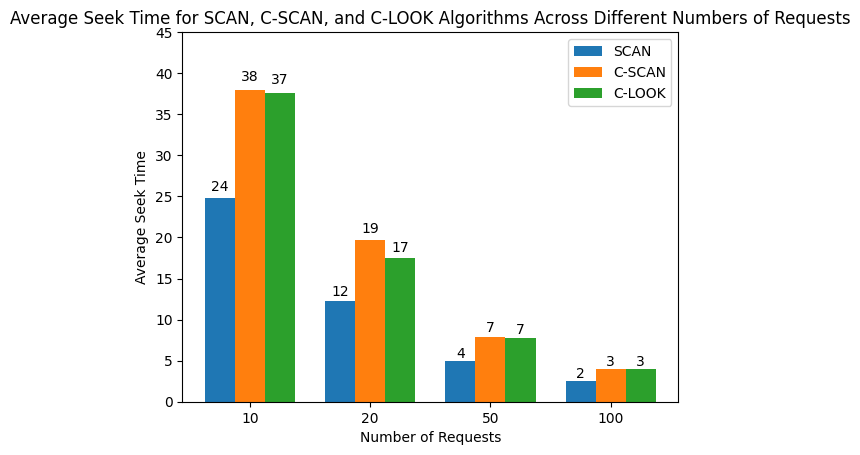

In [31]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, avg_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, avg_seek_time_CLOOK, width, label='C-LOOK')


# Labelling
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Average Seek Time')
ax.set_title('Average Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# Set the y-axis limit
ax.set_ylim(0, 45)


# Function to add label on bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
        

# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

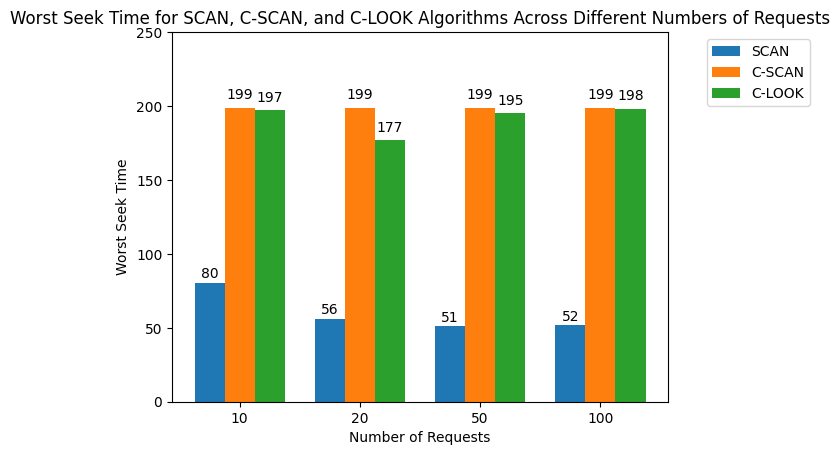

In [32]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, worst_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, worst_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, worst_seek_time_CLOOK, width, label='C-LOOK')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Worst Seek Time')
ax.set_title('Worst Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)


# Legend placement
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


# Set the y-axis limit
ax.set_ylim(0, 250)


# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()